# GPR

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor                 
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared,Matern
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import (RationalQuadratic,Exponentiation)
from sklearn.gaussian_process.kernels import CompoundKernel
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

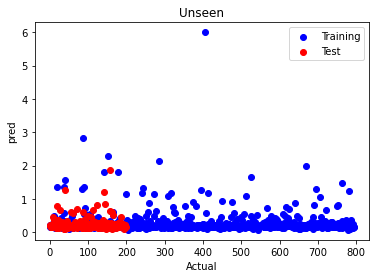

In [2]:

Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib24']
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

In [3]:
state=19

In [2]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib24']

In [3]:
modo=GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) ** 2 + WhiteKernel(noise_level=0.5),
                         n_restarts_optimizer=4, normalize_y=True,
                         random_state=0)

mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

In [4]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [7]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=state)


In [5]:
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

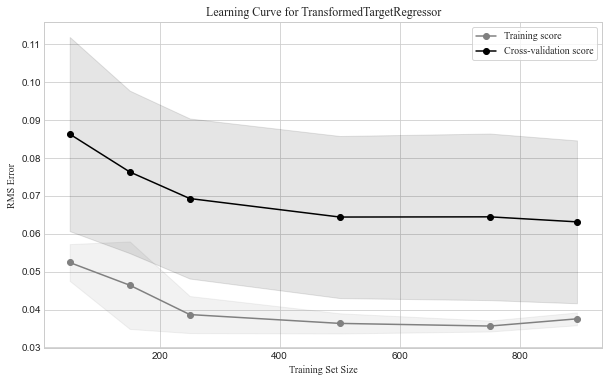

In [6]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
csfont = {'fontname':'Times New Roman'}    
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
# plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color='gray',label="Training score",markeredgecolor='gray')
plt.plot(train_size, test_mean, 'o-', color='k',label="Cross-validation score",markeredgecolor='k')
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='gray',alpha=0.1)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='k', alpha=0.1)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
plt.xlabel("Training Set Size",**csfont)
plt.ylabel("RMS Error",**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)
plt.show()

In [7]:
pd.DataFrame(test_mean)

,0
0,0.086318
1,0.076326
2,0.069300
3,0.064416
4,0.064470
5,0.063146


In [8]:
X = X.to_numpy()
y = y.to_numpy()

In [9]:
y_Test=y_Test.to_numpy()

In [10]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

Root Mean squared error: 0.112665

Root Mean squared error: 0.272637

Root Mean squared error: 0.107586

Root Mean squared error: 0.208197

Root Mean squared error: 0.073934

Root Mean squared error: 0.572124

Root Mean squared error: 0.144930

Root Mean squared error: 0.069171

Root Mean squared error: 0.180179

Root Mean squared error: 0.089878



In [11]:
ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.097696
dtype: float64  error mean --->0    0.056352
Name: mean, dtype: float64  error std --->0    0.11821
Name: std, dtype: float64


In [22]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.017764
std,0.217142
min,-0.356028
25%,-0.020503
50%,-0.005119
75%,0.010094
max,4.987476


In [23]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.000597
std,0.108832
min,-0.263390
25%,-0.025692
50%,-0.007755
75%,0.013183
max,0.842372


# train score

In [12]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.521347
dtype: float64  error mean --->0    0.038177
Name: mean, dtype: float64  error std --->0    0.134433
Name: std, dtype: float64


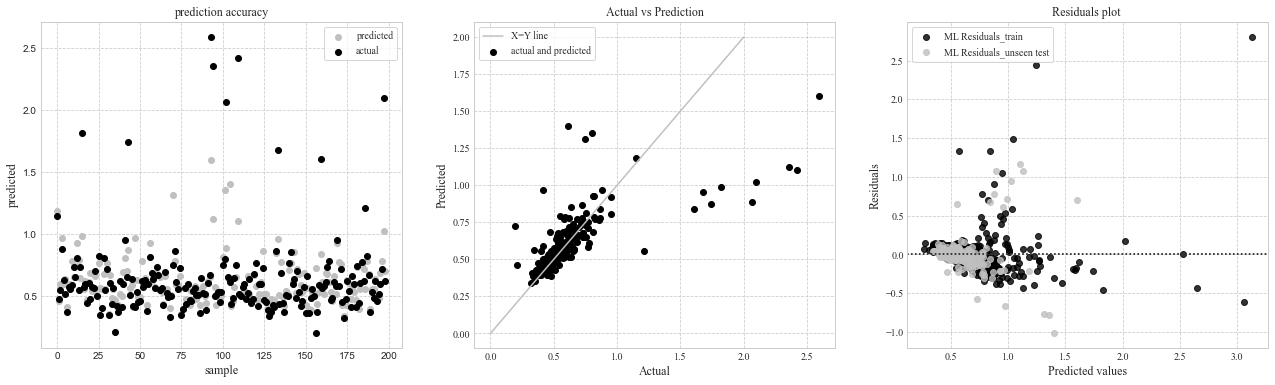

In [16]:
plt.figure(figsize=(22, 6))
plt.style.use('seaborn-whitegrid')
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,color='silver',label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual',color='k')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted',color='k')
plt.plot([0,2],[0,2],color='silver',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train',color='k')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test',color='silver')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)


plt.show()